# Autograd no MXNET
<https://mxnet.apache.org/versions/1.8.0/api/python/docs/tutorials/packages/autograd/index.html>


In [1]:
import mxnet as mx
from mxnet import autograd
from mxnet.gluon.nn import HybridSequential, Dense
from mxnet.gluon.loss import L2Loss
from mxnet import np, npx
from d2l import mxnet as d2l



## Define Network


### HybridBlcks
<https://gluon.mxnet.io/chapter07_distributed-learning/hybridize.html>

In [2]:
net=HybridSequential()
net.add(Dense(units=3))
net.add(Dense(units=1))
net.initialize()
net.summary

[16:25:30] /home/mertins/Desenvolvimento/C/Terceiros/mxnet/src/storage/storage.cc:205: Using Pooled (Naive) StorageManager for CPU


<bound method Block.summary of HybridSequential(
  (0): Dense(-1 -> 3, linear)
  (1): Dense(-1 -> 1, linear)
)>

### Define função de perda

Função de perda calcula o erro para um único exemplo de treinamento enquanto a função de custo é a média das funções de perda para todo o conjunto de treinamento. 
Isto é verdade?? Acho que muitas vezes são utilizadas de forma similar.

Lost Function == Cost function 


In [3]:
loss_fn=L2Loss()

### Dados ficticios (dummy data) 

In [4]:
# x=mx.np.array([[0.3,0.5]],ctx=npx.gpu(0))
#y=mx.np.array([[1.5]],ctx=npx.gpu(0))
x=mx.np.array([[0.3,0.5]])
y=mx.np.array([[1.5]])

In [5]:
x,y

(array([[0.3, 0.5]]), array([[1.5]]))

In [6]:
with autograd.record():
    y_hat=net(x)
    loss=loss_fn(y_hat,y)
loss.backward()

In [7]:
print(net[0].weight.grad(),net[1].weight.grad(),net[0].bias.data(),net[1].bias.data())

[[-0.0028251  -0.00470849]
 [-0.02185716 -0.0364286 ]
 [ 0.00480542  0.00800903]] [[-0.01281239 -0.04966008 -0.04401871]] [0. 0. 0.] [0.]


In [8]:
net(mx.np.array([[0.3,0.5]]))

array([[0.00135072]])

In [9]:
net[1].bias.data()

array([0.])

## Switching between training vs inference modes

In [10]:
dropout=mx.gluon.nn.Dropout(rate=0.5)
data=mx.np.ones(shape=(3,3))

output=dropout(data)
is_training=autograd.is_training()
print('is_training',is_training,output)


is_training False [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [11]:
with autograd.record():
    output=dropout(data)
    is_training=autograd.is_training()
print('is_training',is_training,output)

is_training True [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 2.]]


In [12]:
dropout.summary

<bound method Block.summary of Dropout(p = 0.5, axes=())>

## Advanced: Calculation non-parameter gradients

In [13]:
x=mx.np.array([1,2,3])
x.attach_grad()
with autograd.record():
    y=2*x**2
y.backward()
print(x.grad)

[ 4.  8. 12.]


## Advanded: Using Python control flow

In [14]:
import math

def f(x):
    y=x
    if x<0.75:
        num_loops=math.floor(1/(1-x.asnumpy()))
        for i in range(num_loops):
            y=y*x
    else:
        y=y*0
    return y
       

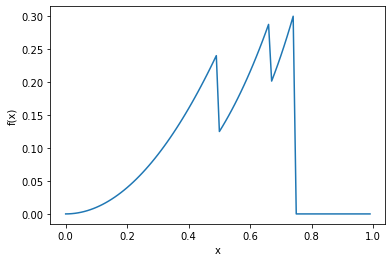

In [15]:
X=mx.np.arange(0.0,1.0,step=0.01)

xpoints = X
ypoints = [f(x) for x in X] 

d2l.plt.plot(xpoints,ypoints,label='x')
d2l.plt.ylabel('f(x)')
d2l.plt.xlabel('x')

d2l.plt.show()



In [16]:
def get_grad(f,x):
    x.attach_grad()
    with autograd.record():
        y=f(x)
    y.backward()
    return x.grad

In [19]:
xs=mx.np.arange(0.0,1.0,step=0.1)
grads=[get_grad(f,x).asnumpy() for x in xs]
# grads = [get_grad(f, x).asscalar() for x in xs]
print(grads)

[array(0., dtype=float32), array(0.2, dtype=float32), array(0.4, dtype=float32), array(0.6, dtype=float32), array(0.8, dtype=float32), array(0.75, dtype=float32), array(1.08, dtype=float32), array(1.372, dtype=float32), array(0., dtype=float32), array(0., dtype=float32)]


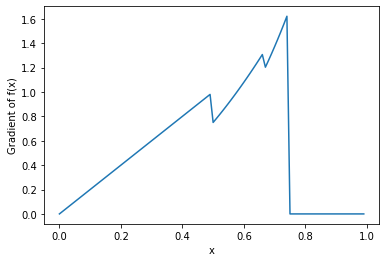

In [22]:
X=mx.np.arange(0.0,1.0,step=0.01)
xpoints = X
ypoints =[get_grad(f,x) for x in X]

d2l.plt.plot(xpoints,ypoints,label='x')
d2l.plt.ylabel('Gradient of f(x)')
d2l.plt.xlabel('x')

d2l.plt.show()


In [32]:
x=mx.nd.array([2,])
x.attach_grad()
with autograd.record():
    y=x**3
y_np=y.asnumpy()
z_np=y_np**2
dzdy_np=2*y_np

dzdy=mx.nd.array(dzdy_np)
y.backward(dzdy)
print(x.grad)



[192.]
<NDArray 1 @cpu(0)>
